IMPORT PACKAGES

In [1]:
import numpy  as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

from scipy.stats import uniform, binom

In [26]:
#ISSUE: Testing the effectiveness of a new drug
#Intial trial: 10 out of 15 were cured
#Second Trial: 9 out of 13 were cured

GENERATE GRID COMPONENTS

In [3]:
num_patients = np.arange(1, 16, 1)
efficacy_rate = np.arange(.01, 1.01, .01)

COMPILE DATAFRAME

In [4]:
patients = pd.DataFrame([(x, y) for x in num_patients for y in efficacy_rate])

In [5]:
patients.columns = ['num_patients', 'efficacy_rate']

CREATE PRIOR PROBABILITY BASELINE DATA

In [6]:
patients["prior"] = uniform.pdf(patients['efficacy_rate'])

In [7]:
patients['likelihood'] = binom.pmf(patients['num_patients'], 15, patients['efficacy_rate'])

In [8]:
patients['posterior_prob'] = patients['prior'] * patients['likelihood']

In [9]:
patients['posterior_prob'] /= patients['posterior_prob'].sum()

COMPUTE THE POSTERIOR PROB OF OBSERVING 10

In [10]:
cured_patients = patients[patients['num_patients'] == 9]

In [11]:
cured_patients

,num_patients,efficacy_rate,prior,likelihood,posterior_prob
800,9,0.01,1.0,4.712108e-15,5.000247e-17
801,9,0.02,1.0,2.270024e-12,2.408833e-14
802,9,0.03,1.0,8.205892e-11,8.707671e-13
803,9,0.04,1.0,1.027002e-09,1.089802e-11
804,9,0.05,1.0,7.185810e-09,7.625213e-11
...,...,...,...,...,...
895,9,0.96,1.0,1.419728e-05,1.506542e-07
896,9,0.97,1.0,2.773813e-06,2.943428e-08
897,9,0.98,1.0,2.670661e-07,2.833968e-09
898,9,0.99,1.0,4.572154e-09,4.851735e-11


In [12]:
cured_patients['posterior_prob'] / cured_patients['posterior_prob'].sum()

800    7.539373e-16
801    3.632039e-13
802    1.312943e-11
803    1.643204e-10
804    1.149730e-09
           ...     
895    2.271565e-06
896    4.438101e-07
897    4.273057e-08
898    7.315446e-10
899    0.000000e+00
Name: posterior_prob, Length: 100, dtype: float64

In [16]:
peak = cured_patients[cured_patients['posterior_prob'] == max(cured_patients['posterior_prob'])]['efficacy_rate']

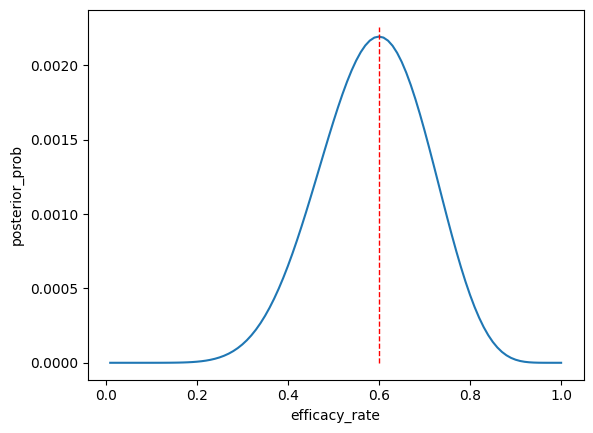

In [22]:
sns.lineplot(data=cured_patients, x='efficacy_rate', y='posterior_prob')
plt.vlines(peak, ymin=0, ymax=max(cured_patients['posterior_prob'])*1.03, color='red', ls='--', lw=1)
plt.show()

In [ ]:
patients["prior"] = uniform.pdf(patients['efficacy_rate'])

GENERATE REVISED POSTERIOR PROB WITH SECOND TRIAL

In [23]:
patients['New_Prior'] = patients['posterior_prob']

In [27]:
patients['New_Likelihood'] = binom.pmf(patients['num_patients'], 13, patients['efficacy_rate'])

In [28]:
patients['new_posterior_prob'] = patients['New_Prior'] * patients['New_Likelihood']

In [29]:
patients['new_posterior_prob'] /= patients['new_posterior_prob'].sum()

In [30]:
patients_cured_new = patients[patients['num_patients'] == 9]

In [31]:
peak = patients_cured_new[patients_cured_new['new_posterior_prob'] == max(patients_cured_new['new_posterior_prob'])]['efficacy_rate']

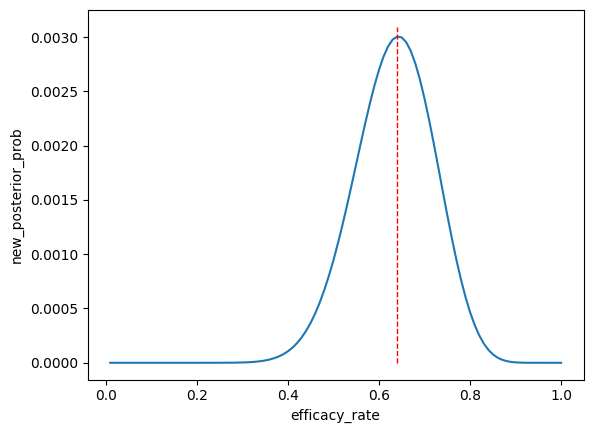

In [33]:
sns.lineplot(data=patients_cured_new, x='efficacy_rate', y='new_posterior_prob')
plt.vlines(peak, ymin=0, ymax=max(patients_cured_new['new_posterior_prob'])*1.03, color='red', ls='--', lw=1)
plt.show()